Aura-SR
====

Based on the paper: **Scaling up GANs for Text-to-Image Synthesis**

https://arxiv.org/abs/2303.05511

![GigaGAN](../assets/gigagan_overview.png)

```bash
pip install torch torchvision
pip install transformers
pip install aura-sr
```

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from aura_sr import AuraSR


aura_sr = AuraSR.from_pretrained("fal/AuraSR-v2")


Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 88301.14it/s]


In [19]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")


# downscale the image
downscaled_image = image.resize(
    (image.size[0] // 10, image.size[1] // 10), Image.LANCZOS
)
print("Input image size", downscaled_image.size)

# inference: upscaling the image
upscaled_image = aura_sr.upscale_4x_overlapped(downscaled_image)
print("Upscaled image size", upscaled_image.size)

Input image size (106, 113)
Upscaled image size (424, 452)


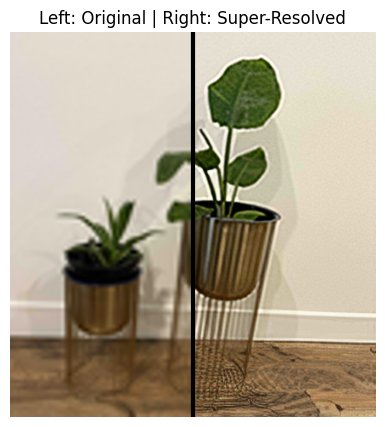

In [20]:
def visualize_sr_comparison(
    original_img: Image.Image, sr_img: Image.Image):
    # Ensure both images have the same height
    sr_img = sr_img.resize((original_img.width * 4, original_img.height * 4))  # assume 4x upscaling

    # Get sizes
    h = sr_img.height
    orig_w = original_img.width
    sr_w = sr_img.width

    # Extract left half of original
    left_orig = original_img.crop((0, 0, orig_w // 2, original_img.height))
    left_orig = left_orig.resize((sr_w // 2, h), Image.BICUBIC)  # upscale to match SR height

    # Extract right half of super-res image
    right_sr = sr_img.crop((sr_w // 2, 0, sr_w, h))

    # Create new image with black separator
    separator_width = 5
    new_width = (sr_w // 2) + separator_width + (sr_w // 2)
    combined_img = Image.new("RGB", (new_width, h), color="black")

    # Paste the two halves
    combined_img.paste(left_orig, (0, 0))
    combined_img.paste(right_sr, (sr_w // 2 + separator_width, 0))

    # Show using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(combined_img)
    plt.axis("off")
    plt.title("Left: Original | Right: Super-Resolved")
    plt.show()

# Visualize the comparison
visualize_sr_comparison(downscaled_image, upscaled_image)
